# Изучение источников трафика для определения невыгодных источников и перераспределения бюджета

Меня пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:

- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Мне предстоит изучить:

- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Выручка измеряется в условных единицах — у.е.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Импортируем-файлы-с-данными-и-изучим-информацию-в-них" data-toc-modified-id="1.-Импортируем-файлы-с-данными-и-изучим-информацию-в-них-1">1. Импортируем файлы с данными и изучим информацию в них</a></span><ul class="toc-item"><li><span><a href="#1.-Вывод" data-toc-modified-id="1.-Вывод-1.1">1. Вывод</a></span></li></ul></li><li><span><a href="#2.-Рассчитаем-метрики-и-построим-графики" data-toc-modified-id="2.-Рассчитаем-метрики-и-построим-графики-2">2. Рассчитаем метрики и построим графики</a></span><ul class="toc-item"><li><span><a href="#2.1-Продуктовые-метрики" data-toc-modified-id="2.1-Продуктовые-метрики-2.1">2.1 Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Рассчитаем-DAU,-WAU-и-MAU.-Вычислим-средние-значения-этих-метрик-за-весь-период" data-toc-modified-id="2.1.1-Рассчитаем-DAU,-WAU-и-MAU.-Вычислим-средние-значения-этих-метрик-за-весь-период-2.1.1">2.1.1 Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период</a></span></li><li><span><a href="#2.1.1-Вывод" data-toc-modified-id="2.1.1-Вывод-2.1.2">2.1.1 Вывод</a></span></li><li><span><a href="#2.1.2-Определим,-сколько-раз-за-день-пользователи-в-среднем-заходят-на-сайт" data-toc-modified-id="2.1.2-Определим,-сколько-раз-за-день-пользователи-в-среднем-заходят-на-сайт-2.1.3">2.1.2 Определим, сколько раз за день пользователи в среднем заходят на сайт</a></span></li><li><span><a href="#2.1.2-Вывод" data-toc-modified-id="2.1.2-Вывод-2.1.4">2.1.2 Вывод</a></span></li><li><span><a href="#2.1.3-Определим-продолжительность-типичной-пользовательской-сессии-за-весь-период" data-toc-modified-id="2.1.3-Определим-продолжительность-типичной-пользовательской-сессии-за-весь-период-2.1.5">2.1.3 Определим продолжительность типичной пользовательской сессии за весь период</a></span></li><li><span><a href="#2.1.3-Вывод" data-toc-modified-id="2.1.3-Вывод-2.1.6">2.1.3 Вывод</a></span></li><li><span><a href="#2.1.4-Расчитаем-Retention-Rate.-Опеределим-средний-Retention-Rate-на-второй-месяц-«жизни»-когорт" data-toc-modified-id="2.1.4-Расчитаем-Retention-Rate.-Опеределим-средний-Retention-Rate-на-второй-месяц-«жизни»-когорт-2.1.7">2.1.4 Расчитаем Retention Rate. Опеределим средний Retention Rate на второй месяц «жизни» когорт</a></span></li><li><span><a href="#2.1.4-Вывод" data-toc-modified-id="2.1.4-Вывод-2.1.8">2.1.4 Вывод</a></span></li></ul></li><li><span><a href="#2.1-Вывод" data-toc-modified-id="2.1-Вывод-2.2">2.1 Вывод</a></span></li><li><span><a href="#2.2-Метрики-электронной-коммерции" data-toc-modified-id="2.2-Метрики-электронной-коммерции-2.3">2.2 Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Исследуем,-сколько-времени-в-среднем-проходит-с-момента-первого-посещения-сайта-до-совершения-покупки" data-toc-modified-id="2.2.1-Исследуем,-сколько-времени-в-среднем-проходит-с-момента-первого-посещения-сайта-до-совершения-покупки-2.3.1">2.2.1 Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки</a></span></li><li><span><a href="#2.2.1-Вывод" data-toc-modified-id="2.2.1-Вывод-2.3.2">2.2.1 Вывод</a></span></li><li><span><a href="#2.2.2-Рассчитаем-среднее-количество-покупок-на-одного-покупателя-за-период-6-месяцев." data-toc-modified-id="2.2.2-Рассчитаем-среднее-количество-покупок-на-одного-покупателя-за-период-6-месяцев.-2.3.3">2.2.2 Рассчитаем среднее количество покупок на одного покупателя за период 6 месяцев.</a></span></li><li><span><a href="#2.2.2-Вывод" data-toc-modified-id="2.2.2-Вывод-2.3.4">2.2.2 Вывод</a></span></li><li><span><a href="#2.2.3-Рассчитаем-средний-чек" data-toc-modified-id="2.2.3-Рассчитаем-средний-чек-2.3.5">2.2.3 Рассчитаем средний чек</a></span></li><li><span><a href="#2.2.3-Вывод" data-toc-modified-id="2.2.3-Вывод-2.3.6">2.2.3 Вывод</a></span></li><li><span><a href="#2.2.4-Выясним,-как-меняется-средний-LTV-по-когортам-за-6-месяцев." data-toc-modified-id="2.2.4-Выясним,-как-меняется-средний-LTV-по-когортам-за-6-месяцев.-2.3.7">2.2.4 Выясним, как меняется средний LTV по когортам за 6 месяцев.</a></span></li><li><span><a href="#2.2.4-Вывод" data-toc-modified-id="2.2.4-Вывод-2.3.8">2.2.4 Вывод</a></span></li></ul></li><li><span><a href="#2.2-Вывод" data-toc-modified-id="2.2-Вывод-2.4">2.2 Вывод</a></span></li><li><span><a href="#2.3-Маркетинговые-метрики" data-toc-modified-id="2.3-Маркетинговые-метрики-2.5">2.3 Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#2.3.1-Посчитаем-общую-сумму-расходов-на-маркетинг.-Выясним,-как-траты-распределены-по-источникам" data-toc-modified-id="2.3.1-Посчитаем-общую-сумму-расходов-на-маркетинг.-Выясним,-как-траты-распределены-по-источникам-2.5.1">2.3.1 Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам</a></span></li><li><span><a href="#2.3.1-Вывод" data-toc-modified-id="2.3.1-Вывод-2.5.2">2.3.1 Вывод</a></span></li><li><span><a href="#2.3.2-Рассчитаем-средний-CAC-на-одного-покупателя-для-всего-проекта-и-для-каждого-источника-трафика" data-toc-modified-id="2.3.2-Рассчитаем-средний-CAC-на-одного-покупателя-для-всего-проекта-и-для-каждого-источника-трафика-2.5.3">2.3.2 Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика</a></span><ul class="toc-item"><li><span><a href="#Источник-первого-визита" data-toc-modified-id="Источник-первого-визита-2.5.3.1">Источник первого визита</a></span></li><li><span><a href="#Добавляем-источник-в-заказы" data-toc-modified-id="Добавляем-источник-в-заказы-2.5.3.2">Добавляем источник в заказы</a></span></li><li><span><a href="#Месяц-первого-заказа" data-toc-modified-id="Месяц-первого-заказа-2.5.3.3">Месяц первого заказа</a></span></li><li><span><a href="#Добавляем-месяц-первого-заказа-в-таблицу-заказов" data-toc-modified-id="Добавляем-месяц-первого-заказа-в-таблицу-заказов-2.5.3.4">Добавляем месяц первого заказа в таблицу заказов</a></span></li><li><span><a href="#Посчитаем-размер-когорт" data-toc-modified-id="Посчитаем-размер-когорт-2.5.3.5">Посчитаем размер когорт</a></span></li><li><span><a href="#Подготовим-таблицу-затрат-на-маркетинг-(по-источнику)-и-посчитам-по-таблице-заказов-кол-во-уникальных-пользователей-из-каждого-источника" data-toc-modified-id="Подготовим-таблицу-затрат-на-маркетинг-(по-источнику)-и-посчитам-по-таблице-заказов-кол-во-уникальных-пользователей-из-каждого-источника-2.5.3.6">Подготовим таблицу затрат на маркетинг (по источнику) и посчитам по таблице заказов кол-во уникальных пользователей из каждого источника</a></span></li></ul></li><li><span><a href="#2.3.2-Вывод" data-toc-modified-id="2.3.2-Вывод-2.5.4">2.3.2 Вывод</a></span></li><li><span><a href="#2.3.3-Рассчитаем-ROMI-по-когортам-в-разрезе-источников.-Сравним-окупаемость-за-одинаковые-периоды-жизни-когорт." data-toc-modified-id="2.3.3-Рассчитаем-ROMI-по-когортам-в-разрезе-источников.-Сравним-окупаемость-за-одинаковые-периоды-жизни-когорт.-2.5.5">2.3.3 Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт.</a></span></li><li><span><a href="#2.3.3-Вывод" data-toc-modified-id="2.3.3-Вывод-2.5.6">2.3.3 Вывод</a></span></li></ul></li><li><span><a href="#2.3-Вывод" data-toc-modified-id="2.3-Вывод-2.6">2.3 Вывод</a></span></li></ul></li><li><span><a href="#3-Сформулируем-выводы-и-рекомендации" data-toc-modified-id="3-Сформулируем-выводы-и-рекомендации-3">3 Сформулируем выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#3.1-Источники-трафика,-на-которые-маркетологам-стоит-делать-упор" data-toc-modified-id="3.1-Источники-трафика,-на-которые-маркетологам-стоит-делать-упор-3.1">3.1 Источники трафика, на которые маркетологам стоит делать упор</a></span></li><li><span><a href="#3.2-Опишем-выводы,-которые-мы-сделали-после-подсчёта-метрик-каждого-вида:-маркетинговых,-продуктовых-и-метрик-электронной-коммерции" data-toc-modified-id="3.2-Опишем-выводы,-которые-мы-сделали-после-подсчёта-метрик-каждого-вида:-маркетинговых,-продуктовых-и-метрик-электронной-коммерции-3.2">3.2 Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции</a></span></li><li><span><a href="#3.3-Подведем-итоги-когортного-анализа.-Определим-самые-перспективные-для-компании-когорты-клиентов" data-toc-modified-id="3.3-Подведем-итоги-когортного-анализа.-Определим-самые-перспективные-для-компании-когорты-клиентов-3.3">3.3 Подведем итоги когортного анализа. Определим самые перспективные для компании когорты клиентов</a></span></li></ul></li></ul></div>

## 1. Импортируем файлы с данными и изучим информацию в них

Выгрузим все необходимые нам библиотеки, и загрузим исходные файлы

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Посмотрим на исходные таблицы по очереди начнем с визитов

In [3]:
display(visits.head(10))

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063

Таблица содержит 5 столбцов:
- `Device` - тип устройства с которого был выволнени визит
- `End Ts` - дата и время окончания сессии
- `Source Id` - уникальный номер источника трафика
- `Start Ts` - дата и время начала сессии
- `Uid` - уникальный номер пользователя

Приведем название столбцов к нижнему регистру и переименнуем столбцы чтобы между ними не было **пробелов**

In [4]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(
    columns={'end ts': 'end_ts',
             'source id': 'source_id',
             'start ts': 'start_ts'}
    )

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Пропущенных значений нет, все данные полные.
Тип данных для столбцов `end_ts` и `start_ts` - `object`, хотя в них указана дата и время, приведем данные столбцы к правильному типу `datetime`. 

In [6]:
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M")
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M")
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


Проверим таблицу на наличие дубликатов

In [7]:
visits.duplicated().sum()

0

Дубликаты отсутсвуют

Теперь посмотрим на таблицу таблицу `orders`

In [8]:
display(orders.head(10))

Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382

Таблица содержит 3 столбца:

- `Buy Ts` - время покупки
- `Revenue` - сумма заказа
- `Uid` - уникальный номер пользователя

Приведем название столбцов к нижнему регистру и переименнуем столбец `Buy Ts` чтобы в его написании не было **пробела**

In [9]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'buy ts': 'buy_ts'})

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Пропуски в данных отсутствуют, это хорошо. Тип данных для столбца `Buy Ts` - `object`, хотя в нем указана дата и время, приведем данный столбец к правильному типу `datetime`.

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M")
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Проверим таблицу на наличие дубликатов

In [12]:
orders.duplicated().sum()

0

Дубликаты отсутсвуют

Далее проверим таблицу `costs`

In [13]:
display(costs.head(10))

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24

Таблица содержит 3 столбца:

- `source_id` - индефикатор источника
- `dt` - дата покупки
- `costs` - расходы

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Пропуски в данных отсутствуют. Тип данных для столбца `dt` - `object`, хотя в нем указана дата и время, приведем данный столбец к правильному типу `datetime`.

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Проверим наличие дубликатов

In [16]:
costs.duplicated().sum()

0

Дубликаты отсутсвуют

### 1. Вывод

Загрузили необходимые нам данные в три переменных `visits`, `orders` и `costs`.

Таблица `visits` содержит данные о визитах пользователей, а именно с какого устройства был выполнен вход и его уникальный индефикатор, время начало и конца сессии, а также уникальный номер пользователя.

Таблица `orders` содержит данные о доходах с каждой покупки пользователя, а именно время покупки, доход от данной покупки, а так же уникальный номер пользователя.

Таблица `costs` содержит данные о расходах, а именно уникальный индефикатор источника, дата, а также сумма.

Данные во всех таблица полные, пропусков нет. Дубликаты тоже отсуствуют. В таблицах `visits` и `orders` привели все названия столбцов к нижнему регистру, а также убрали **пробелы** между словами. Во всех таблицах привели столбцы с датой в правильный формат `datetime`.

Вертнуться к [**Содержанию**](#Содержание)

## 2. Рассчитаем метрики и построим графики

Посчитаем метрики трёх видов:
- продуктовые,
- метрики электронной коммерции,
- маркетинговые.

Отобразим на графиках изменения каждой метрики во времени.

### 2.1 Продуктовые метрики

Получим ответы на следующие вопросы:

- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

#### 2.1.1 Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период

Для расчета данных показателей будем пользоваться таблицей `visits`. Добавим в нее четыре столбца:

- `ts_date` - полная дата
- `ts_week` - неделя 
- `ts_month` - месяц
- `ts_year` - год

In [17]:
visits['ts_date']  = visits['start_ts'].dt.date
visits['ts_week'] = visits['start_ts'].dt.strftime('%Y/%W')
visits['ts_month'] = visits['start_ts'].dt.strftime('%Y/%m')
visits.head(10)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid     ts_date  ts_week ts_month  
0  16879256277535980062  2017-12-20  2017/51  2017/12  
1    104060357244891740  2018-02-19  2018/08  2018/02  
2   7459035603376831527  2017-07-01  2017/26  2017/07  
3  16174680259334210214  2018-05-20  2018/20  2018/05  
4   9969694820036681168  2017-12-27  2017/52  2017/12  
5  16007536194108375387  2017-09-03  2017/35  2017/09  
6   6661610529277171451  2018-01-30  2018/05  2018/01  
7  11423865690854540312  2017-11-05  2017/44  2017/11  
8   2987360259350925644  2017-07-19  2017/29  2017/07  
9   1289240080042562063  2017-11-08  2017/45  2017/11

Посчитаем метрики. Сгруппируем данные по уникальным пользователям и найдём среднее

In [18]:
dau = visits.groupby('ts_date').agg({'uid': 'nunique'}).mean()
wau = visits.groupby('ts_week').agg({'uid': 'nunique'}).mean()
mau = visits.groupby('ts_month').agg({'uid': 'nunique'}).mean()
print(int(dau))
print(int(wau))
print(int(mau))

907
5716
23228


Посмотри как данные показатели ведут себя в динамике, построим графики по времени для каждой метрики

In [19]:
#Функция для построения графиков
def scatter(data, columns):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data.index, y=data[columns]))
    fig.show()

Построим график для **DAU**

In [20]:
dau_pivot = visits.pivot_table(index='ts_date', values='uid', aggfunc='nunique')
scatter(dau_pivot, 'uid')

Больше всего пользователей заходило на сайт 24 ноября 2017 года - 3319 человек, меньше всего 31 марта 2018 года - 1 человек, но это больше похоже на "выброс" или возможный сбой в работе ресурса, тк таких маленьких показателей больше нет, да и график распределяется достаточно ровно. Так же можно выделить период с 6 октября 2017 года по 26 марта 2018 года, тк в это время на ресурс заходило в средем больше всго людей в день, предполагаю что это связанно с временем года, тк в в эти даты на улице стоит чаще всего холодная погода, что заставляет людей проводить свой досуг в театрах, кино и тп.

In [21]:
wau_pivot = visits.pivot_table(index='ts_week', values='uid', aggfunc='nunique')
scatter(wau_pivot, 'uid')


Больше всего пользователей заходило на ресурс в 47 неделю 2017 года - 10586, меньше всего в 22 неделю 2017 года, всего 2021 пользователь. Так же можно выделить период с 40 недели 2017 года по 12 неделю 2018 года, когда среднее количество пользователей в неделю было гораздо выше чем в другие недели. Так же как с показателем DAU связываю это с временем года и невозможность проводитьсвой досуг на улице из за холодной погоды, что и заставляет людей чаще ходить на всевозможные мероприятия проводящиеся в помещении.

In [22]:
mau_pivot = visits.pivot_table(index='ts_month', values='uid', aggfunc='nunique')
scatter(mau_pivot, 'uid')

Ноябрь 2017 года показал самую большую посещаемость ресурса пользователями - 32797, а вот август 2017 года самую маленькую, всего 11631 пользователь посетил ресурс. Как и в случаем с дневным и месяцчным посещением, можно выделить период с октября 2017 года по март 2018 года, как период с самым частым посещением ресурса.

#### 2.1.1 Вывод

Отвечая на вопрос "Сколько людей пользуются в день, неделю, месяц?" получили следующий результат:

- Среднее количетсво пользователей в день **907**
- Среднее количетсво пользователей в неделю **5716**
- Среднее количетсво пользователей в месяц **23228**

С октября 2017 года по март 2018 года ресуср посещает больше пользователей чем в другие периоды. Противоположные результаты у периода с июня 2017 года по сентябрь 2017 года. Это скорее всего связанно с сезонностью, тк в темлое время года люди больше проводят досуг на открытом воздухе, а в зимнее вынуждены проводить досуг в помещениях.

Вертнуться к [**Содержанию**](#Содержание)

#### 2.1.2 Определим, сколько раз за день пользователи в среднем заходят на сайт

Для этого найдем сколько всего сессий совершает пользователи и поделим их на колличество пользователей. После этого возьмем среднее от всего столбца, что и будет являться ответом

In [23]:
visits_per_user = visits.groupby('ts_date').agg({'uid': ['count', 'nunique']})
visits_per_user.columns = ['n_sessions', 'n_users']
visits_per_user['sessions_per_user'] = (
    visits_per_user['n_sessions'] / visits_per_user['n_users']
    )
display(visits_per_user['sessions_per_user'].mean())

1.082169644003972

#### 2.1.2 Вывод

В среднем пользователи заходят на сайт один раз в день

Вертнуться к [**Содержанию**](#Содержание)

#### 2.1.3 Определим продолжительность типичной пользовательской сессии за весь период

Для ответа на данный вопрос вычтим из врмени окончания сессии время ее начала в секундах и возьмем среднее значение по всему столбцу

In [24]:
visits['session_duration_sec'] = (
    (visits['end_ts'] - visits['start_ts']).dt.seconds
    )
print(visits['session_duration_sec'].mean())

643.506488592098


В среднем пользователи проводят на сайте около 10 минут. проверим этот  результат, посмотрим на распределением через гистограмму

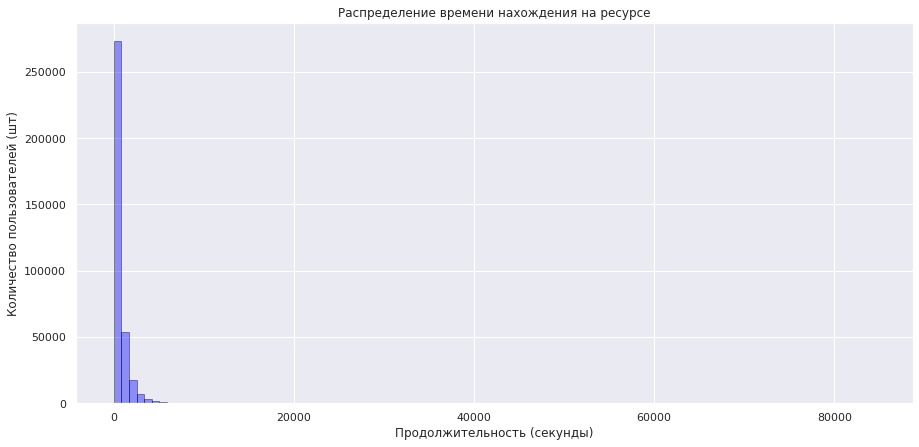

In [25]:
#Функция построения гистограмм
def hist(data, bins):
    sns.distplot(data,
                 hist=True,
                 kde=False, 
                 bins=bins,
                 color = 'blue',
                 hist_kws={'edgecolor':'black'}
                )


plt.figure(figsize=(15,7))
sns.set()
hist(visits['session_duration_sec'], 100)
plt.title('Распределение времени нахождения на ресурсе')
plt.xlabel('Продолжительность (секунды)')
plt.ylabel('Количество пользователей (шт)')
plt.show()

Распределение не нормально, среднее значение брать не корректно. Возьмем *моду* по столбцу с продолжительностью сессии

In [26]:
print(visits['session_duration_sec'].mode())

0    60
dtype: int64


#### 2.1.3 Вывод

В среднем пользователя проводят на сайте 60 секунд. 

Вертнуться к [**Содержанию**](#Содержание)

#### 2.1.4 Расчитаем Retention Rate. Опеределим средний Retention Rate на второй месяц «жизни» когорт

Определим дату начала захода на сайт для каждого пользователя добавим ее в столбец `first_activity_date`

In [27]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')
visits.head(10)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
5  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
6  desktop 2018-01-30 12:09:00          1 2018-01-30 11:13:00   
7    touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
8  desktop 2017-07-19 10:44:00          3 2017-07-19 10:41:00   
9  desktop 2017-11-08 13:43:00          5 2017-11-08 13:42:00   

                    uid     ts_date  ts_week ts_month  session_duration_sec  \
0  16879256277535980062  2017-12-20  2017/51  2017/12                  1080   
1    104060357244891740  2018-02-19  2018/08  2018/02                  1680   
2   7459035603376831527  2017-07-01  2017/26  2017/07                     0   
3  16174680259334210214  2018-05-20  2018/20  2018/05                  1440   
4   9969694820036681168  2017-12-27  2017/52  2017/12                     0   
5  16007536194108375387  2017-09-03  2017/35  2017/09                    60   
6   6661610529277171451  2018-01-30  2018/05  2018/01                  3360   
7  11423865690854540312  2017-11-05  2017/44  2017/11                    60   
8   2987360259350925644  2017-07-19  2017/29  2017/07                   180   
9   1289240080042562063  2017-11-08  2017/45  2017/11                    60   

  first_activity_date  
0 2017-12-20 17:20:00  
1 2018-02-19 16:53:00  
2 2017-07-01 01:54:00  
3 2018-03-09 20:05:00  
4 2017-12-27 14:06:00  
5 2017-09-03 21:35:00  
6 2017-06-29 09:00:00  
7 2017-11-05 15:14:00  
8 2017-07-19 10:41:00  
9 2017-11-08 13:42:00

Сформируем столбцы с месяцем первого входа на сайт `first_activity_month` и месяцем сессии `activity_month`

In [28]:
visits['activity_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_activity_month'] = (
    visits['first_activity_date'].astype('datetime64[M]')
    )

Добавим столбец с месяцами "жизни" когорт `cohort_lifetime`

In [29]:
visits['cohort_lifetime'] = (
    visits['activity_month'] - visits['first_activity_month']
    )
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')

Посчитаем количество пользователей для каждой когорты за месяц "жизни"

In [30]:
cohorts = (visits.groupby(['first_activity_month','cohort_lifetime'])
           .agg({'uid':'nunique'}).reset_index()
          )

Посчитаем колличество пользователей на старте в каждой когорте

In [31]:
initial_users_count = (
    cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]
    )
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

Соединим таблицы и посчитаем **Retention Rate**

In [32]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

Оставим в обозначении когорты только год, месяц и день

In [33]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].dt.strftime('%Y.%m.%d') 

Создаим сводную таблицу и выведем результат подсчета **Retention Rate**

In [34]:
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'
    )
display(retention_pivot)

cohort_lifetime        0         1         2         3         4         5   \
first_activity_month                                                          
2017.06.01            1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017.07.01            1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017.08.01            1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017.09.01            1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017.10.01            1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017.11.01            1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017.12.01            1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018.01.01            1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018.02.01            1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018.03.01            1.0  0.041818  0.027053       NaN       NaN       NaN   
2018.04.01            1.0  0.048380       NaN       NaN       NaN       NaN   
2018.05.01            1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime             6         7         8         9         10  \
first_activity_month                                                     
2017.06.01            0.061015  0.057772  0.052342  0.050833  0.040652   
2017.07.01            0.045358  0.045738  0.038813  0.028615  0.027473   
2017.08.01            0.036342  0.039485  0.027895  0.026029       NaN   
2017.09.01            0.035860  0.024186  0.022809       NaN       NaN   
2017.10.01            0.021365  0.020364       NaN       NaN       NaN   
2017.11.01            0.021800       NaN       NaN       NaN       NaN   
2017.12.01                 NaN       NaN       NaN       NaN       NaN   
2018.01.01                 NaN       NaN       NaN       NaN       NaN   
2018.02.01                 NaN       NaN       NaN       NaN       NaN   
2018.03.01                 NaN       NaN       NaN       NaN       NaN   
2018.04.01                 NaN       NaN       NaN       NaN       NaN   
2018.05.01                 NaN       NaN       NaN       NaN       NaN   

cohort_lifetime             11  
first_activity_month            
2017.06.01            0.044951  
2017.07.01                 NaN  
2017.08.01                 NaN  
2017.09.01                 NaN  
2017.10.01                 NaN  
2017.11.01                 NaN  
2017.12.01                 NaN  
2018.01.01                 NaN  
2018.02.01                 NaN  
2018.03.01                 NaN  
2018.04.01                 NaN  
2018.05.01                 NaN

Визуализируем **Retention Rate**

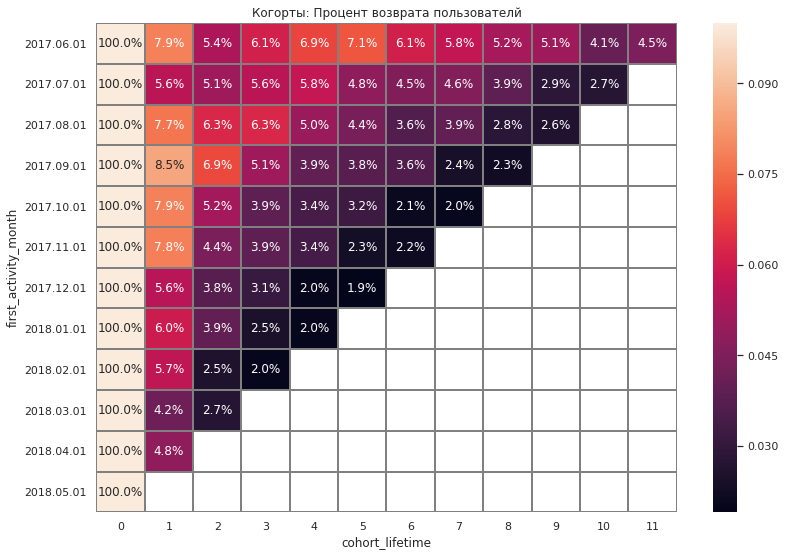

In [35]:
#Напишем функцию для построения тепловой карты
def heatmap(data, fmt, vmax):
    sns.heatmap(
        data,
        annot=True,
        fmt=fmt,
        linewidths=1,
        linecolor='gray',
        vmax=vmax
        )
    
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: Процент возврата пользователй')    
heatmap(retention_pivot, '.1%', 0.1)
plt.show()

Рассчитаем средний показатель по всем когортам на 1 месяц

In [36]:
cohorts_on_first_month = cohorts.query('cohort_lifetime == 1')
rr__on_first_month = cohorts_on_first_month['retention'].mean()*100
rr__on_first_month

6.516659710392834

#### 2.1.4 Вывод

Процент возврата клиентов достаточно низкий, в среднем на первый месяц по всем когортам возращается всего 6,5% пользователей. На второй месяц возращается всего от 4,2 до 8,5 % клиентов, в зависимости от когорты.
Процент возрата пользователей падает с наступление каждого нового месяца "жизни" когорты, кроме самой первой когорты, которая пользуется данным ресурсом с июня 2017 года.

### 2.1 Вывод

Ответим на поставленные вопросы:

- **Сколько людей пользуются в день, неделю, месяц?** - в среднем на ресурс в день заходит *907* пользователей, в неделю заходит *5716* пользоватлей, а в месяц *23228* пользоватлей. Вообще в общей посещяемости истончика прослеживается сезонность, тк с октября 2017 года по март 2018 года ресуср посещает больше все пользователей, а с июня 2017 года по сентябрь 2017 года меньше всего.
- **Сколько сессий в день?** - в среднем пользователи заходят на сайт один раз в день
- **Сколько длится одна сессия?** - длина одной сессии составляет 1 минуту
- **Как часто люди возвращаются?** - процент возврата пользователей достаточно низкий всего 6,5% и уменьшается с каждым месяцем "жизни" когорты. Данное явление справедливо для всех когорт, кроме первой. В ней процент возрата падает на 3 месяц "жизни", а потом растет вплоть до 5 месяца "жизни" и после вновь начинает свое падение, однаков показатели возврата остаются намнго выше чем в остальных когортах

Вертнуться к [**Содержанию**](#Содержание)

### 2.2 Метрики электронной коммерции

Получим ответы на следующие вопросы:

- Когда пользователи начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

#### 2.2.1 Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки 

Сначала найдем для каждого пользователя дату первого заказа, для этого воспользуемся таблицей `orders`, а так же  воспользуемся переменной `first_activity_date`, где указана дата первой сесси пользователя обьедем эти списки в одну таблицу `time_to_buy`

In [37]:
first_orders_date = orders.groupby(['uid'])['buy_ts'].min()
first_orders_date.name = 'first_orders_date'
first_orders_date = first_orders_date.reset_index()
time_to_buy = first_orders_date.merge(first_activity_date, on='uid')
time_to_buy.head()

uid   first_orders_date first_activity_date
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00

Добавим в таблицу столбец `time_diff` с разницей между первой сессией пользователя и первой покупкой

In [38]:
time_to_buy['time_diff'] = (
    time_to_buy['first_orders_date'] - time_to_buy['first_activity_date']
    )
time_to_buy['time_diff'] = time_to_buy['time_diff']/np.timedelta64(1, 'm')
time_to_buy['time_diff'] = time_to_buy['time_diff'].round(1)
time_to_buy.head()

uid   first_orders_date first_activity_date  time_diff
0   313578113262317 2018-01-03 21:51:00 2017-09-18 22:49:00   154022.0
1  1575281904278712 2017-06-03 10:13:00 2017-06-03 10:13:00        0.0
2  2429014661409475 2017-10-11 18:33:00 2017-10-11 17:14:00       79.0
3  2464366381792757 2018-01-28 15:54:00 2018-01-27 20:10:00     1184.0
4  2551852515556206 2017-11-24 10:14:00 2017-11-24 10:14:00        0.0

Первая же строка показывает пользователя у которго с момента первого захода на ресурс до первой покупки прошло 154022 минуты или 2567 дней или чуть больше 3 месяцев. Среднее значение по столбцу, для ответа на вопрос не подойдет. Попробуем медиану

Сгрупируем таблицу по пользователям и отобразим минимальное время заказа для каждого и посчитаем медиану по столбцу `time_diff`

In [39]:
time_to_buy_min = time_to_buy.groupby('uid')[['time_diff']].min()
print(time_to_buy_min['time_diff'].median())

16.0


16 минут достаточно не плохой ответ, но давайте посмотрим на распределение с помощью гистограммы

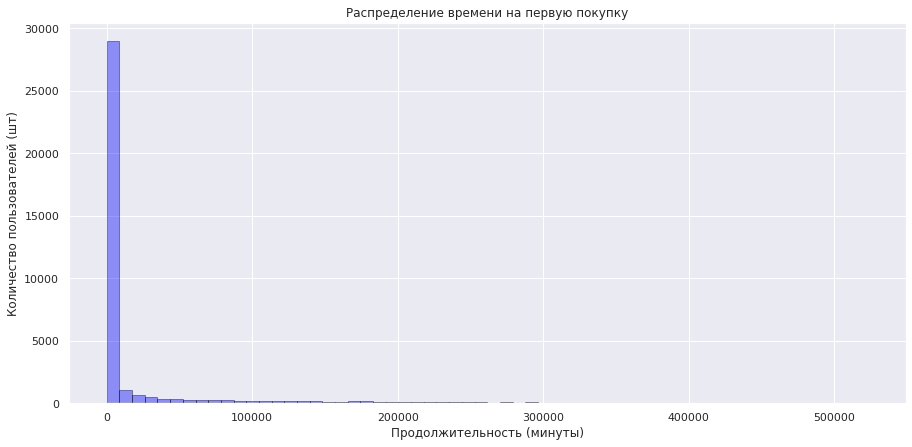

In [40]:
plt.figure(figsize=(15,7))
sns.set()
hist(time_to_buy_min['time_diff'], 60)
plt.title('Распределение времени на первую покупку')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество пользователей (шт)')
plt.show()

Данные имеют слишком много выбросов, ограничим время 60 минутами и посмотрим н выбросы

Text(0, 0.5, 'Минуты')

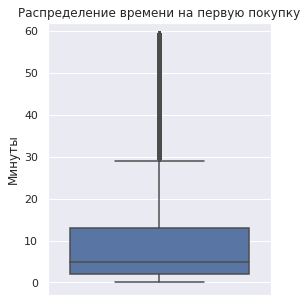

In [41]:
time_to_buy_min_q = time_to_buy_min.query('time_diff < 60')
plt.figure(figsize=(4,5))
sns.set()
sns.boxplot(y=time_to_buy_min_q['time_diff'])
plt.title('Распределение времени на первую покупку')
plt.ylabel('Минуты')

Выбросы начинаются примерно с 30 минут, ограничим их данным врменем и посмотрим гистограмму

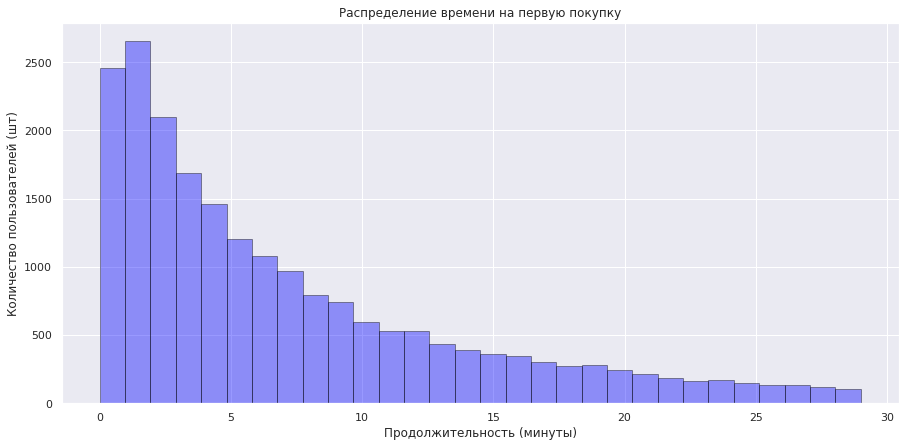

In [42]:
time_to_buy_min_q1 = time_to_buy_min.query('time_diff < 30')

plt.figure(figsize=(15,7))
sns.set()
hist(time_to_buy_min_q1['time_diff'], 30)
plt.title('Распределение времени на первую покупку')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество пользователей (шт)')
plt.show()

По гистограмме видно что большинству пользователе хватет до 3х минут для совршения первой покупки.

#### 2.2.1 Вывод

Большинству пользвателей обычно хватает до 3х минут чтобы сделать свой первый заказ. Зашел, купил и вышел.

Вертнуться к [**Содержанию**](#Содержание)

#### 2.2.2 Рассчитаем среднее количество покупок на одного покупателя за период 6 месяцев. 

Для начала добавим в таблицу `orders_first` столбец с данными первой покупки, для этого обьеденим таблицы `orders` и `first_orders_date` методом `merge`

In [43]:
orders_first = orders.merge(first_orders_date, on='uid')
orders_first.head()

buy_ts  revenue                   uid   first_orders_date
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

Сформируем столбец с месяцем первой покупки `first_orders_month` и месяцем покупки `orders_month`

In [44]:
orders_first['first_orders_month'] = (
    orders_first['first_orders_date'].astype('datetime64[M]')
    )
orders_first['orders_month'] = orders_first['buy_ts'].astype('datetime64[M]')
orders_first.head()

buy_ts  revenue                   uid   first_orders_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_orders_month orders_month  
0         2017-06-01   2017-06-01  
1         2017-06-01   2017-06-01  
2         2017-06-01   2017-06-01  
3         2017-06-01   2017-06-01  
4         2017-06-01   2017-06-01

Расчитаем сколько продаж приходится на всех пользователей по когортам

In [45]:
orders_buy_by_month = (
    orders_first.groupby(['first_orders_month','orders_month'])
    .agg({'buy_ts':'count'})
    ).reset_index()
orders_buy_by_month.columns = ['first_orders_month','orders_month','n_buy']
orders_buy_by_month.head()

first_orders_month orders_month  n_buy
0         2017-06-01   2017-06-01   2354
1         2017-06-01   2017-07-01    177
2         2017-06-01   2017-08-01    174
3         2017-06-01   2017-09-01    226
4         2017-06-01   2017-10-01    292

Посчитаем общее количество покупателей для каждой когорты и объеденим данные с таблицей `orders_grouped_by_cohorts`

In [46]:
orders_cohorts_size = (
    orders_first.groupby('first_orders_month')
    .agg({'uid':'nunique'})
    .reset_index()
    )
orders_cohorts_size.columns = ['first_orders_month', 'n_buyers']
orders_buy_by_month = (
    orders_buy_by_month.merge(orders_cohorts_size, on = 'first_orders_month')
    )
orders_buy_by_month

first_orders_month orders_month  n_buy  n_buyers
0          2017-06-01   2017-06-01   2354      2023
1          2017-06-01   2017-07-01    177      2023
2          2017-06-01   2017-08-01    174      2023
3          2017-06-01   2017-09-01    226      2023
4          2017-06-01   2017-10-01    292      2023
..                ...          ...    ...       ...
74         2018-03-01   2018-05-01    176      3533
75         2018-04-01   2018-04-01   2495      2276
76         2018-04-01   2018-05-01    195      2276
77         2018-05-01   2018-05-01   3249      2988
78         2018-06-01   2018-06-01      1         1

[79 rows x 4 columns]

Добавим столбец `orders_per_user` в котором буду указаны среднее число покупок на одного пользователя

In [47]:
orders_buy_by_month['orders_per_user'] = (
    orders_buy_by_month['n_buy'] / orders_buy_by_month['n_buyers']
    )
orders_buy_by_month.head()

first_orders_month orders_month  n_buy  n_buyers  orders_per_user
0         2017-06-01   2017-06-01   2354      2023         1.163618
1         2017-06-01   2017-07-01    177      2023         0.087494
2         2017-06-01   2017-08-01    174      2023         0.086011
3         2017-06-01   2017-09-01    226      2023         0.111715
4         2017-06-01   2017-10-01    292      2023         0.144340

Добавим столбец `cohort_lifetime` в котором будут указано целое число месяцев, обозначающее порядковый месяц совершения покупки относительно месяца первой покупки.

In [48]:
orders_buy_by_month['cohort_lifetime'] = (
    orders_buy_by_month['orders_month'] - orders_buy_by_month['first_orders_month']
    )
orders_buy_by_month['cohort_lifetime'] = (
    orders_buy_by_month['cohort_lifetime'] / np.timedelta64(1,'M')
    )
orders_buy_by_month['cohort_lifetime'] =(
    orders_buy_by_month['cohort_lifetime'].round().astype('int')
    )
orders_buy_by_month.head()

first_orders_month orders_month  n_buy  n_buyers  orders_per_user  \
0         2017-06-01   2017-06-01   2354      2023         1.163618   
1         2017-06-01   2017-07-01    177      2023         0.087494   
2         2017-06-01   2017-08-01    174      2023         0.086011   
3         2017-06-01   2017-09-01    226      2023         0.111715   
4         2017-06-01   2017-10-01    292      2023         0.144340   

   cohort_lifetime  
0                0  
1                1  
2                2  
3                3  
4                4

In [49]:
orders_buy_by_month['first_orders_month'] = (
    orders_buy_by_month['first_orders_month'].dt.strftime('%Y.%m.%d')
    )

Построим сводную таблицу в котрой будут указаны изменения количества покупок в зависимости от месяца "жизни" когорты

In [50]:
orders_per_user_pivot = orders_buy_by_month.pivot_table(
    index='first_orders_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='mean'
    ).cumsum(axis=1).round(2)

display(orders_per_user_pivot)

cohort_lifetime       0     1     2     3     4     5     6     7     8   \
first_orders_month                                                         
2017.06.01          1.16  1.25  1.34  1.45  1.59  1.70  1.84  1.92  2.03   
2017.07.01          1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47   
2017.08.01          1.12  1.20  1.27  1.33  1.39  1.44  1.47  1.53  1.56   
2017.09.01          1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48  1.50   
2017.10.01          1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38   NaN   
2017.11.01          1.18  1.28  1.32  1.37  1.41  1.42  1.45   NaN   NaN   
2017.12.01          1.15  1.21  1.26  1.30  1.32  1.34   NaN   NaN   NaN   
2018.01.01          1.12  1.19  1.24  1.25  1.28   NaN   NaN   NaN   NaN   
2018.02.01          1.12  1.18  1.21  1.22   NaN   NaN   NaN   NaN   NaN   
2018.03.01          1.17  1.22  1.27   NaN   NaN   NaN   NaN   NaN   NaN   
2018.04.01          1.10  1.18   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018.05.01          1.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018.06.01          1.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_lifetime       9     10    11  
first_orders_month                    
2017.06.01          2.10  2.15  2.19  
2017.07.01          1.49  1.51   NaN  
2017.08.01          1.60   NaN   NaN  
2017.09.01           NaN   NaN   NaN  
2017.10.01           NaN   NaN   NaN  
2017.11.01           NaN   NaN   NaN  
2017.12.01           NaN   NaN   NaN  
2018.01.01           NaN   NaN   NaN  
2018.02.01           NaN   NaN   NaN  
2018.03.01           NaN   NaN   NaN  
2018.04.01           NaN   NaN   NaN  
2018.05.01           NaN   NaN   NaN  
2018.06.01           NaN   NaN   NaN

Посмотрим на среднее количество покупок на одного покупателя за 6 месяцев

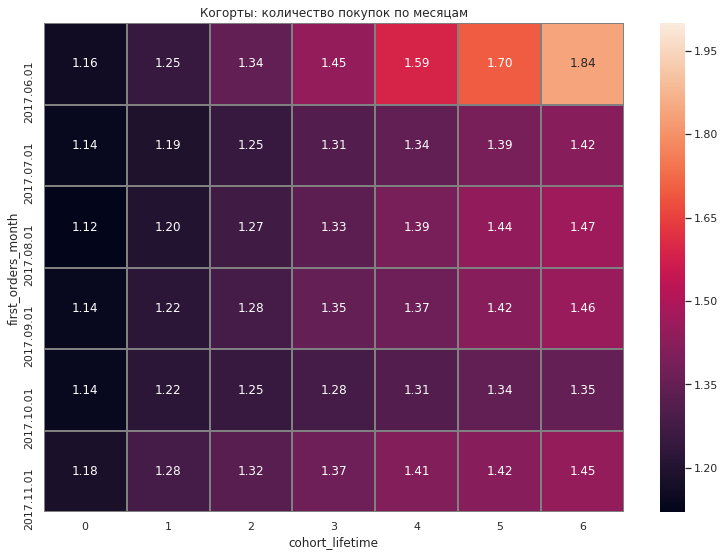

In [51]:
orders_per_user_sum = orders_per_user_pivot.iloc[0:6, 0:7]
orders_per_user_sum.head(6)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: количество покупок по месяцам')
heatmap(orders_per_user_sum, '.2f', 2)
plt.show()

#### 2.2.2 Вывод

Отвечая на вопрос "Сколько раз покупают за период?" можно отметить следующие закономерности. Когорта от июня 2017 года имеет в среднем 1,84 покупки в месяц и это самй лучший результат, самые худшие покупки в среднем за месяц у когорты от октября 2017 года, всего 1,35. Остальные когорты имеют примерно равынй показатель, оно колеблится в диапазоне от 1,42 до 1,47 покупок в среднем за месяц.

Вертнуться к [**Содержанию**](#Содержание)

#### 2.2.3 Рассчитаем средний чек

Возьмем из предыдущего задания таблицу `orders_first` в котрой помимо основных столбоц добавлены столбцы с датой первой покупки `first_orders_date`, месяцем первой покупки `first_orders_month` и столбец с месяцем покупки `orders_month`

In [52]:
orders_first.head()

buy_ts  revenue                   uid   first_orders_date  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_orders_month orders_month  
0         2017-06-01   2017-06-01  
1         2017-06-01   2017-06-01  
2         2017-06-01   2017-06-01  
3         2017-06-01   2017-06-01  
4         2017-06-01   2017-06-01

Расчитаем на кукую сумму покупали все пользователи по когортам

In [53]:
orders_grouped_by_cohorts_revenue = (
    orders_first.groupby(['first_orders_month','orders_month'])
    .agg({'revenue':'sum','uid':'nunique'})
    )
orders_grouped_by_cohorts_revenue.head()

revenue   uid
first_orders_month orders_month               
2017-06-01         2017-06-01    9557.49  2023
                   2017-07-01     981.82    61
                   2017-08-01     885.34    50
                   2017-09-01    1931.30    54
                   2017-10-01    2068.58    88

Посчитаем средний чек покупателя, добавим эти значения в столбец `revenue_per_user`

In [54]:
orders_grouped_by_cohorts_revenue['revenue_per_user'] = (
    orders_grouped_by_cohorts_revenue['revenue'] 
    / orders_grouped_by_cohorts_revenue['uid']
    )
orders_grouped_by_cohorts_revenue.head()

revenue   uid  revenue_per_user
first_orders_month orders_month                                 
2017-06-01         2017-06-01    9557.49  2023          4.724414
                   2017-07-01     981.82    61         16.095410
                   2017-08-01     885.34    50         17.706800
                   2017-09-01    1931.30    54         35.764815
                   2017-10-01    2068.58    88         23.506591

Добавим столбец cohort_lifetime в котором будут указано целое число месяцев, обозначающее порядковый месяц совершения покупки относительно месяца первой покупки.

In [55]:
orders_grouped_by_cohorts_revenue = (
    orders_grouped_by_cohorts_revenue.reset_index()
    )
orders_grouped_by_cohorts_revenue['cohort_lifetime'] = (
    orders_grouped_by_cohorts_revenue['orders_month']
    - orders_grouped_by_cohorts_revenue['first_orders_month']
    )
orders_grouped_by_cohorts_revenue['cohort_lifetime'] = (
    orders_grouped_by_cohorts_revenue['cohort_lifetime'] / np.timedelta64(1,'M')
    )
orders_grouped_by_cohorts_revenue['cohort_lifetime'] =(
    orders_grouped_by_cohorts_revenue['cohort_lifetime'].round().astype('int')
    )
orders_grouped_by_cohorts_revenue.head()

first_orders_month orders_month  revenue   uid  revenue_per_user  \
0         2017-06-01   2017-06-01  9557.49  2023          4.724414   
1         2017-06-01   2017-07-01   981.82    61         16.095410   
2         2017-06-01   2017-08-01   885.34    50         17.706800   
3         2017-06-01   2017-09-01  1931.30    54         35.764815   
4         2017-06-01   2017-10-01  2068.58    88         23.506591   

   cohort_lifetime  
0                0  
1                1  
2                2  
3                3  
4                4

In [56]:
orders_grouped_by_cohorts_revenue['first_orders_month'] = (
    orders_grouped_by_cohorts_revenue['first_orders_month'].dt.strftime('%Y.%m.%d')
    )

Построим сводную таблицу в котрой будут указаны изменения среднего чека покупателя в зависимости от месяца "жизни" когорты

In [57]:
orders_per_user_revenue_pivot = orders_grouped_by_cohorts_revenue.pivot_table(
    index='first_orders_month',
    columns='cohort_lifetime',
    values='revenue_per_user',
    aggfunc='mean'
    )
display(orders_per_user_revenue_pivot)

cohort_lifetime           0          1          2           3          4   \
first_orders_month                                                          
2017.06.01          4.724414  16.095410  17.706800   35.764815  23.506591   
2017.07.01          6.010218  12.396346  21.035965   10.786094   6.938163   
2017.08.01          5.276518  11.148793  11.851321   12.182955  16.921250   
2017.09.01          5.644529  22.188385  13.445200  138.669189  19.881538   
2017.10.01          5.003733  11.287427   6.753252    7.413152   7.072796   
2017.11.01          5.154683   7.339054   6.786583   12.510660   7.457284   
2017.12.01          4.738191   7.816575  39.366019   48.135052  27.431400   
2018.01.01          4.135636   8.721228  12.365542   11.199767   4.699556   
2018.02.01          4.156987   8.610000   4.942414    6.941026        NaN   
2018.03.01          4.838803  11.811667  19.221897         NaN        NaN   
2018.04.01          4.657597  17.535072        NaN         NaN        NaN   
2018.05.01          4.660562        NaN        NaN         NaN        NaN   
2018.06.01          3.420000        NaN        NaN         NaN        NaN   

cohort_lifetime            5          6          7          8          9   \
first_orders_month                                                          
2017.06.01          22.207761  31.011935  25.033191  19.295690  27.233556   
2017.07.01           7.896842   6.421111   6.992821   7.382143  12.861818   
2017.08.01          12.139063   9.620333  12.610455  21.070000   8.307419   
2017.09.01          26.095000  27.437121  16.961351  11.044651        NaN   
2017.10.01           7.255139   6.573214   7.479701        NaN        NaN   
2017.11.01           4.580833   7.564839        NaN        NaN        NaN   
2017.12.01          23.518413        NaN        NaN        NaN        NaN   
2018.01.01                NaN        NaN        NaN        NaN        NaN   
2018.02.01                NaN        NaN        NaN        NaN        NaN   
2018.03.01                NaN        NaN        NaN        NaN        NaN   
2018.04.01                NaN        NaN        NaN        NaN        NaN   
2018.05.01                NaN        NaN        NaN        NaN        NaN   
2018.06.01                NaN        NaN        NaN        NaN        NaN   

cohort_lifetime            10        11  
first_orders_month                       
2017.06.01          25.681333  9.804151  
2017.07.01          11.513846       NaN  
2017.08.01                NaN       NaN  
2017.09.01                NaN       NaN  
2017.10.01                NaN       NaN  
2017.11.01                NaN       NaN  
2017.12.01                NaN       NaN  
2018.01.01                NaN       NaN  
2018.02.01                NaN       NaN  
2018.03.01                NaN       NaN  
2018.04.01                NaN       NaN  
2018.05.01                NaN       NaN  
2018.06.01                NaN       NaN

Для наглядности построим тепловую карту

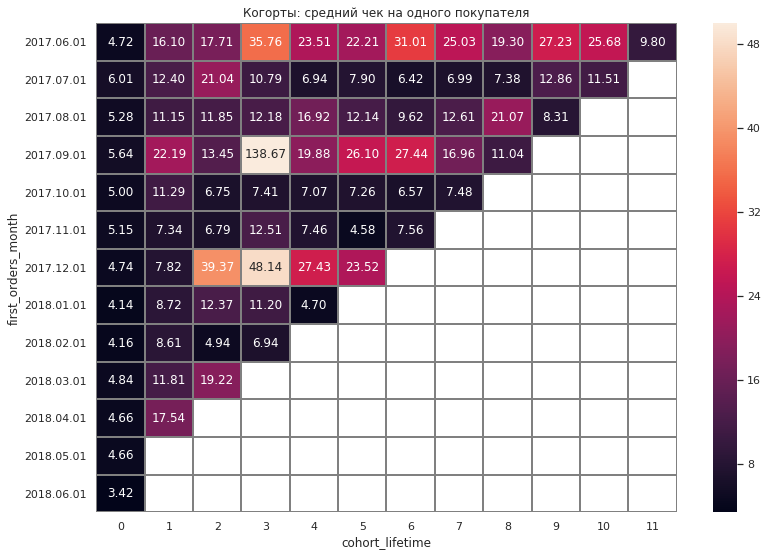

In [58]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: средний чек на одного покупателя')
heatmap(orders_per_user_revenue_pivot, '.2f', 50)
plt.show()

Посчитаем средний чек для всех пользователй и посмотрим как он ведет себя на в разрезе месяцев, для этого добавим столбец `order_month`, в котором выделим месяц из даты заказа.

In [59]:
# Вычислим месяц заказа
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

# Посчитам средний чек в разрезе месяцев
total_average_check_by_month = orders.pivot_table(
        index='order_month',
        values='revenue',
        aggfunc='mean'
    )

#Построим график
scatter(total_average_check_by_month, 'revenue')

Средний чек имеет свой самый большой показатель в декабре 2017 года - 30,47 у.е. и самые маленькие в июне 2017 года - 4,72 у.е. и июне 2018 года - 3,42 у.е.. Как и в метриках с посещением, здесь четко прорисовывается зависимость от сезонности.

#### 2.2.3 Вывод

Для всех когорт можно сказать что средний чек, после первой покупки растет. Особо выделяется, как и в прошлых показателя когорта июня 2017, однако есть также очень инетересные значения в когортах от сентября 2017, а именно за третий месяц "жизни", а так же от декабря 2017 года, где на второй и третий месяц "жизни" достаточно высокие показатели среднего чека на одного пользователя. Так же можно сказать что величина среднего чека зависит от сеззоноси, тк в июне 2017 и 2018 годов средний чек имеет самые низкие показатели а в декабре  2017 самые высокие.

Вертнуться к [**Содержанию**](#Содержание)

#### 2.2.4 Выясним, как меняется средний LTV по когортам за 6 месяцев.

Для расчета данного показателя нам понадобиться таблица `orders`. Получим месяц первой покупки каждого покупателя

In [60]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders.head()

uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

Посчитаем количество новых покупателей `n_buyers` за каждый месяц:

In [61]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340

Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами

In [62]:
orders_new = pd.merge(orders,first_orders, on='uid')
orders_new.head()

buy_ts  revenue                   uid order_month  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку

In [63]:
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

first_order_month order_month  revenue
0        2017-06-01  2017-06-01  9557.49
1        2017-06-01  2017-07-01   981.82
2        2017-06-01  2017-08-01   885.34
3        2017-06-01  2017-09-01  1931.30
4        2017-06-01  2017-10-01  2068.58

Добавим в таблицу `cohorts` данные о том, сколько людей первый раз совершили покупку в каждый месяц

In [64]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

first_order_month  n_buyers order_month  revenue
0        2017-06-01      2023  2017-06-01  9557.49
1        2017-06-01      2023  2017-07-01   981.82
2        2017-06-01      2023  2017-08-01   885.34
3        2017-06-01      2023  2017-09-01  1931.30
4        2017-06-01      2023  2017-10-01  2068.58

Найдем валовую прибыль, умножив выручку на маржинальность. Маржинальность сервиса — 100%.

In [65]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report.head()

first_order_month  n_buyers order_month  revenue       gp
0        2017-06-01      2023  2017-06-01  9557.49  9557.49
1        2017-06-01      2023  2017-07-01   981.82   981.82
2        2017-06-01      2023  2017-08-01   885.34   885.34
3        2017-06-01      2023  2017-09-01  1931.30  1931.30
4        2017-06-01      2023  2017-10-01  2068.58  2068.58

Выделим «возрастным» когорты, где в столбцах — не месяц заказа, а возраст `age` когорты

In [66]:
report['age'] = ((report['order_month'] - report['first_order_month'])
                 / np.timedelta64(1, 'M')
                )
report['age'] = report['age'].round().astype('int')
report.head()

first_order_month  n_buyers order_month  revenue       gp  age
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0
1        2017-06-01      2023  2017-07-01   981.82   981.82    1
2        2017-06-01      2023  2017-08-01   885.34   885.34    2
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4

Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. Выведем все это в виде сводной таблицы

In [67]:
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').cumsum(axis=1).round(2)
display(output)

age                  0     1     2      3      4      5      6      7      8   \
first_order_month                                                               
2017-06-01         4.72  5.21  5.65   6.60   7.62   8.36   9.31   9.89  10.45   
2017-07-01         6.01  6.35  6.97   7.33   7.50   7.66   7.78   7.92   8.08   
2017-08-01         5.28  5.75  6.21   6.60   7.09   7.38   7.59   7.99   8.28   
2017-09-01         5.64  6.76  7.28  11.26  11.66  12.31  13.01  13.25  13.44   
2017-10-01         5.00  5.54  5.73   5.89   6.04   6.16   6.24   6.36    NaN   
2017-11-01         5.15  5.55  5.75   6.08   6.23   6.28   6.40    NaN    NaN   
2017-12-01         4.74  5.00  5.92   6.99   7.30   7.64    NaN    NaN    NaN   
2018-01-01         4.14  4.43  4.73   4.88   4.94    NaN    NaN    NaN    NaN   
2018-02-01         4.16  4.44  4.51   4.59    NaN    NaN    NaN    NaN    NaN   
2018-03-01         4.84  5.14  5.46    NaN    NaN    NaN    NaN    NaN    NaN   
2018-04-01         4.66  5.19   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-05-01         4.66   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2018-06-01         3.42   NaN   NaN    NaN    NaN    NaN    NaN    NaN    NaN   

age                   9      10     11  
first_order_month                       
2017-06-01         11.05  11.62  11.88  
2017-07-01          8.23   8.39    NaN  
2017-08-01          8.47    NaN    NaN  
2017-09-01           NaN    NaN    NaN  
2017-10-01           NaN    NaN    NaN  
2017-11-01           NaN    NaN    NaN  
2017-12-01           NaN    NaN    NaN  
2018-01-01           NaN    NaN    NaN  
2018-02-01           NaN    NaN    NaN  
2018-03-01           NaN    NaN    NaN  
2018-04-01           NaN    NaN    NaN  
2018-05-01           NaN    NaN    NaN  
2018-06-01           NaN    NaN    NaN

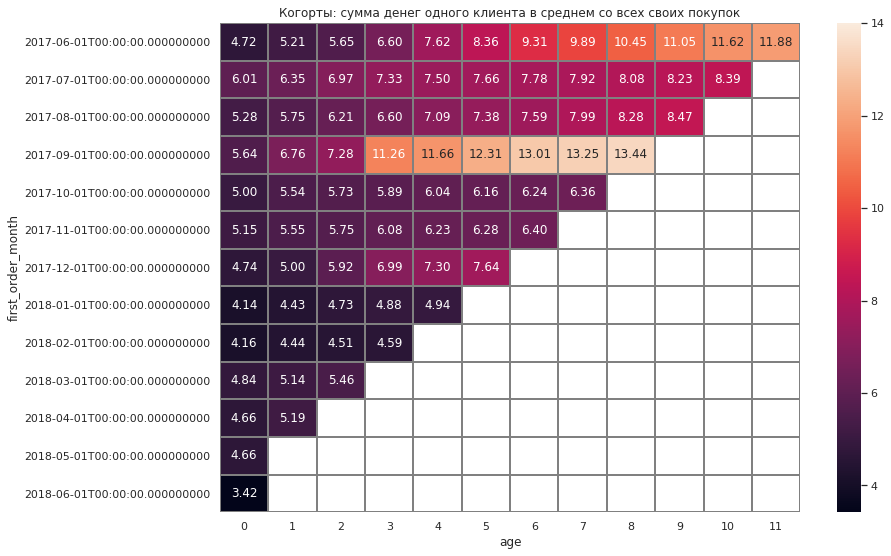

In [68]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: сумма денег одного клиента в среднем со всех своих покупок')
heatmap(output, '.2f', 14)
plt.show()

Показатель **LTV** со временм меняется лучше всех у когорты от сентября 2017 года и на момент послденего месяца своей жизни равен 13,44 у.е. в среднем на одного покупателя. Самый большой рост в данной когорте происходит на третий месяц "жизни" - 11,26 у.е. со второго с показателем 7,28 у.е.. Так же можно выделить когорту от июня 2017 года, где накопительный **LTV** за одинадцать месяцев жизни ревен 11,88 у.е.. В данной когорте нет скачков, она имеет почти раынй прирост на каждый следующий месяц жизни. Так же можно сказать что чем старше когорта тем лучше у нее присрост на следующий месяц "жизни" когорты. 


In [69]:
output_six_month = output.iloc[0:6, 0:7]

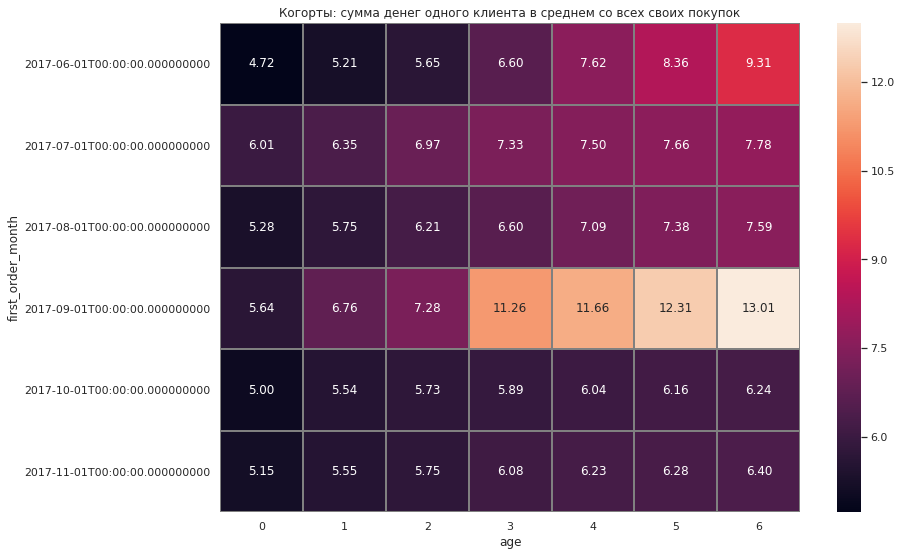

In [70]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Когорты: сумма денег одного клиента в среднем со всех своих покупок')
heatmap(output_six_month, '.2f', 13)
plt.show()

#### 2.2.4 Вывод

В основном у когорт которые "прожили" 6 месяцев и более, резуьтат различается не очень сильно. Выбиваются только 2 когорты, июнь 2017 года и сентябрь 2017. Если для июньской когорты этот результат (9,31 у.е.) достигается почти равным вкладом каждого месяца, то лидертсво сентябрьской когорты (13,01 у.е.) достигается в основном за счет роста показателя со вторго месяца "жизни" на третий, где показатель вырастает с 7,26 у.е. до 11,26 у.е.. Более старые когорты от июля(7,78 у.е.) и августа(7,59 у.е.) 2017 года имеют накопительный результат лучше, чем когорты от октября(6,24 у.е.) и ноября(6,40 у.е.) 2017 года.

### 2.2 Вывод

Ответим на поставленные вопросы:

- **Когда пользователи начинают покупать?** - Чаще всего пользователи покупают очень быстро, на это достаточно 3 минут. 
- **Сколько раз покупают за период?** - Если брать в расчет период 6 месяцев, то наиболее выскоий показатель будет у когорты от июня 2017 года, он равен 1,84 покупки в среднем за месяц. Самым худшим показателем обладает когорта от октября 2017 года, он равен всего 1,35 покупки в среднем за месяц. Все оставшиеся когорты имеют почти оидинаковые результаты, колеблящиеся в диапазоне от 1,42 до 1,47 покупок в среднем за месяц.

- **Какой средний чек?** - Средний чек на следующий месяц после первой покупки растет. Хотелось бы выделить когорту от июня 2017, где показатель среднего чека почти на каждый месяц "жзини" одни из самых высоких, однако нельзя оставить без внимания так же когорту от сентября 2017, а именно за третий месяц "жизни", а так же когорту от декабря 2017 года, где на второй и третий месяц "жизни" достаточно высокие показатели среднего чека на одного пользователя. Что же касается среднего чека на протяжении всего периода ислледования, то он зависит от сезонности, тк в июне 2017 и 2018 годов средний чек имеет самые низкие показатели а в декабре  2017 самые высокие.
- **Сколько денег приносят? (LTV)** - Лидерами по количеству принесенных денег в среднем за 6 месяцев явлвются, когорта от июня 2017 с результатом в 9,31 у.е., что достигается почти раынм вкладом кажждого месяца "жизни", и когорта от сентября 2017 с показателем 13,01 у.е., которая достигает такого результат в основном за счет  роста показателя со вторго месяца "жизни" на третий, где показатель вырастает с 7,26 у.е. до 11,26 у.е.. Так же можно сказать что более старые когорты имеют результат больше чем у более молодых когорт, так для когорт от июля и августа 2017 года результаты 7,78 у.е. и 7,59 у.е. соответсвенно, а для когорт от октября и ноября 2017 года результаты 6,24 у.е. и 6,40 у.е. соответсвенно.

Вертнуться к [**Содержанию**](#Содержание)

### 2.3 Маркетинговые метрики

Ответим на следующие вопросы:

- Сколько всего денег потратили на маркетинг и как траты распределены по источникам?
- Сколько в среднем потратили на одного покупателя всего проекта и для каждого ичтоника трафика?
- Как окуплись инвестиции в маркетинг в разрезе источников?

#### 2.3.1 Посчитаем общую сумму расходов на маркетинг. Выясним, как траты распределены по источникам

Посчитаем сколько всего было потрачено на маркетинг

In [71]:
costs_all_summ = costs['costs'].sum()
costs_all_summ

329131.62

Всего на маркетиг потратили 329131.62 у.е.

Посчитаем затраты на маркетинг в разрезе источников

In [72]:
costs_by_resours = (
    costs.groupby('source_id').agg({'costs': 'sum'}).reset_index()
    )
display(costs_by_resours)

fig = go.Figure()
fig.add_trace(go.Pie(values=costs_by_resours['costs'],
                     labels=costs_by_resours['source_id'], sort = False))
fig.show()

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

Больше всего затрат на маркетинг идет поисточнику 3, на него приходится почти 43%(414321 у.е.) всех затрат на маркетинг. Далее идут источники с примерно равной разницей в показателях между собой под номерами 4(61073 у.е.) 5(51757 у.е.) и 2(42806 у.е.). После них источник 1(20833 у.е.) и замыкают источникис почти раынми результатами 10(5822 у.е.) и 9(5517 у.е.)

#### 2.3.1 Вывод

Всего на маркетинг потратили 329131.62 у.е.

распределение трат по источникам

Источник | 1 | 2 | 3 | 4 | 5 | 9 | 10
--- | --- | --- | --- | --- | --- | --- | ---
Затраты на маркетинг (у.е.)| 20833 | 42806 | 414321 | 61073 | 51757 | 5517 | 5822


Вертнуться к [**Содержанию**](#Содержание)

#### 2.3.2 Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика

Посчитаем расходы за месяц

In [73]:
costs['month'] = costs['dt'].astype('datetime64[M]')

In [74]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum'})
monthly_costs.head()

costs
month               
2017-06-01  18015.00
2017-07-01  18240.59
2017-08-01  14790.54
2017-09-01  24368.91
2017-10-01  36322.88

Добавим данные о расходах в таблицу `report`

In [75]:
report_new = pd.merge(
    report, 
    monthly_costs, 
    left_on='first_order_month', 
    right_on='month'
    )
report_new.head()

first_order_month  n_buyers order_month  revenue       gp  age       ltv  \
0        2017-06-01      2023  2017-06-01  9557.49  9557.49    0  4.724414   
1        2017-06-01      2023  2017-07-01   981.82   981.82    1  0.485329   
2        2017-06-01      2023  2017-08-01   885.34   885.34    2  0.437637   
3        2017-06-01      2023  2017-09-01  1931.30  1931.30    3  0.954671   
4        2017-06-01      2023  2017-10-01  2068.58  2068.58    4  1.022531   

     costs  
0  18015.0  
1  18015.0  
2  18015.0  
3  18015.0  
4  18015.0

Добавим столбец `cac` со значениями данного параметра для всей таблицы и найдем среднее значение по этому столбцу, оно и будет являться САС на одного покупателя для всего проекта 

In [76]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['cac'].mean()

9.319905176921116

Первое что у тебя не выходит, ты странным способом добавляешь источник в заказы и таблица становится больше. Исходная таблица <code>orders</code> имеет размер ~50000 строк, твоя таблица <code>orders_device_source1</code> - ~92000 - естественно так не должно быть.

##### Источник первого визита

In [77]:
# сортируем по времени таблицу визитов, группируем по пользователю и берем первый источник
source_by_user = visits.sort_values(by='start_ts').groupby('uid', as_index=False).agg({'source_id': 'first'})
source_by_user

uid  source_id
0             11863502262781          3
1             49537067089222          2
2            297729379853735          3
3            313578113262317          2
4            325320750514679          5
...                      ...        ...
228164  18446403737806311543          5
228165  18446424184725333426          4
228166  18446556406699109058          3
228167  18446621818809592527          4
228168  18446676030785672386          3

[228169 rows x 2 columns]

##### Добавляем источник в заказы 
Проверяем, что не изменили размер таблицы

In [78]:
print(f'Size before: {orders.shape[0]}')
orders_with_source = orders.merge(source_by_user, on='uid', how='left')
print(f'Size after: {orders_with_source.shape[0]}')
orders_with_source.head()

Size before: 50415
Size after: 50415


buy_ts  revenue                   uid order_month  source_id
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01          1
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01          2
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01          2
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01          2
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01          3

##### Месяц первого заказа
Здесь достаточно взять минимальный месяц заказа при группировке по покупателю

In [79]:
first_order_month_by_user = orders_with_source.groupby('uid', as_index=False).agg({'order_month': 'min'})\
    .rename(columns={'order_month': 'first_order_month'})
first_order_month_by_user.head()

uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01

##### Добавляем месяц первого заказа в таблицу заказов 
Проверяем, что не изменили размер таблицы

In [80]:
print(f'Size before: {orders_with_source.shape[0]}')
orders_with_source_first_order = orders_with_source.merge(first_order_month_by_user, on='uid', how='left')
print(f'Size after: {orders_with_source_first_order.shape[0]}')
orders_with_source_first_order.head()

Size before: 50415
Size after: 50415


buy_ts  revenue                   uid order_month  source_id  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01          1   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01          2   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01          2   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01          2   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01          3   

  first_order_month  
0        2017-06-01  
1        2017-06-01  
2        2017-06-01  
3        2017-06-01  
4        2017-06-01

##### Посчитаем размер когорт

In [81]:
cohort_sizes = orders_with_source_first_order.groupby(['source_id', 'first_order_month'], as_index=False)\
    .agg({'uid': 'nunique'})\
                    .rename(columns={'uid': 'n_buyers'})
cohort_sizes

source_id first_order_month  n_buyers
0           1        2017-06-01       190
1           1        2017-07-01       160
2           1        2017-08-01       113
3           1        2017-09-01       227
4           1        2017-10-01       340
..        ...               ...       ...
81         10        2018-01-01        92
82         10        2018-02-01       123
83         10        2018-03-01       186
84         10        2018-04-01       107
85         10        2018-05-01       130

[86 rows x 3 columns]

##### Подготовим таблицу затрат на маркетинг (по источнику) и посчитам по таблице заказов кол-во уникальных пользователей из каждого источника

In [82]:
# затраты на источник
costs.groupby('source_id', as_index=False).agg({'costs': 'sum'})

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

In [83]:
# кол-во уникальных покупателей из каждого источника
orders_with_source_first_order.groupby('source_id', as_index=False).agg({'uid': 'nunique'})

source_id    uid
0          1   2899
1          2   3506
2          3  10473
3          4  10296
4          5   6931
5          7      1
6          9   1088
7         10   1329

In [84]:
# объединяем таблицы по источнику
cac = pd.merge(costs.groupby('source_id', as_index=False).agg({'costs': 'sum'}),
        orders_with_source_first_order.groupby('source_id', as_index=False).agg({'uid': 'nunique'}), on='source_id')

source_id      costs    uid        cac
0          1   20833.27   2899   7.186364
1          2   42806.04   3506  12.209367
2          3  141321.63  10473  13.493901
3          4   61073.60  10296   5.931779
4          5   51757.10   6931   7.467479
5          9    5517.49   1088   5.071222
6         10    5822.49   1329   4.381106

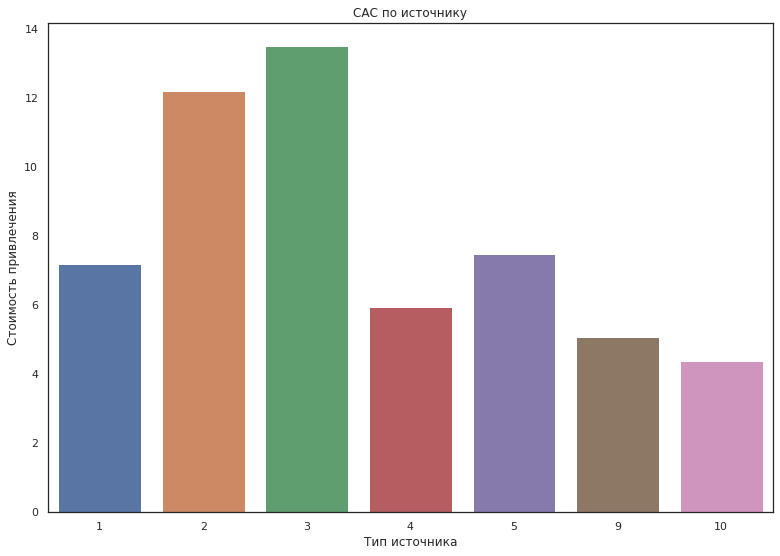

In [85]:
# вычисляем САС по источнику
cac['cac'] = cac['costs'] / cac['uid']
display(cac)
#Построим график для наглядности
plt.figure(figsize = (13, 9))
sns.barplot(x='source_id', y='cac', data=cac)
plt.title('CAC по источнику')
plt.xlabel('Тип источника')
plt.ylabel('Стоимость привлечения')
plt.show()

#### 2.3.2 Вывод

Средний CAC на одного покупателя для всего проекта равен 9.3 у.е.

Самой высокой стоимостью привлечения пользователя является третий источник (CAC = 13,49 у.е.). Далее следуют второй (12.20 у.е), пятый (7.46 у.е.) и первый (7,18 у.е.) рекламные источники. Наиболее дешёвыми по стоимости привлечения пользователя оказались четвертый (5,93 у.е.), девятый (5,07 у.е.) и десятый (4,38 у.е.) рекламные источники.

Таблицы САС по источнику и размеры когорт нужну будут для таблицы <code>report</code> - агрегация по источнику, месяцу заказа и первому месяцу заказа

#### 2.3.3 Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. 

In [86]:
# получаем агрегационную таблицу
report = orders_with_source_first_order\
    .groupby(['source_id', 'order_month', 'first_order_month'], as_index=False).agg({'revenue': 'sum'})
report

source_id order_month first_order_month  revenue
0            1  2017-06-01        2017-06-01  1378.70
1            1  2017-07-01        2017-06-01   414.98
2            1  2017-07-01        2017-07-01  1166.70
3            1  2017-08-01        2017-06-01   419.43
4            1  2017-08-01        2017-07-01   175.31
..         ...         ...               ...      ...
511         10  2018-05-01        2017-10-01    10.87
512         10  2018-05-01        2017-11-01     7.02
513         10  2018-05-01        2017-12-01     4.89
514         10  2018-05-01        2018-03-01     6.29
515         10  2018-05-01        2018-05-01   470.89

[516 rows x 4 columns]

In [87]:
# добавляем к таблице report приготовленные ранее размеры когорт по первому месяцу и источнику и САС по источнику
report = report.merge(cohort_sizes, on=['source_id', 'first_order_month'])\
    .merge(cac[['source_id', 'cac']], on='source_id').copy()
report

source_id order_month first_order_month  revenue  n_buyers       cac
0            1  2017-06-01        2017-06-01  1378.70       190  7.186364
1            1  2017-07-01        2017-06-01   414.98       190  7.186364
2            1  2017-08-01        2017-06-01   419.43       190  7.186364
3            1  2017-09-01        2017-06-01   714.24       190  7.186364
4            1  2017-10-01        2017-06-01   811.20       190  7.186364
..         ...         ...               ...      ...       ...       ...
510         10  2018-03-01        2018-03-01   638.44       186  4.381106
511         10  2018-04-01        2018-03-01    12.71       186  4.381106
512         10  2018-05-01        2018-03-01     6.29       186  4.381106
513         10  2018-04-01        2018-04-01   261.93       107  4.381106
514         10  2018-05-01        2018-05-01   470.89       130  4.381106

[515 rows x 6 columns]

In [88]:
# вычислим возраст когорты
report['age'] = ((report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [89]:
# вычисляем нужные нам параметры LTV и ROMI
report['ltv'] = report['revenue'] / report['n_buyers']
report['romi'] = report['ltv'] / report['cac']

Мы подготовили основную таблицу отчета, из нее мы можем узнать все необходимые метрики в любых разрезах

**Общий LTV**

In [90]:
report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).fillna('')

age                      0        1        2        3        4        5   \
first_order_month                                                          
2017-06-01         4.538087  5.09809  5.74375  7.06619  8.43306   9.3315   
2017-07-01         5.798336  6.18289  7.29964   7.7527  8.06458  8.29604   
2017-08-01         5.356883  5.85965  6.34681   6.7687  7.26812  7.54313   
2017-09-01         5.336339   7.0404  7.69799  10.4674  10.9131  11.5086   
2017-10-01         5.089034  5.79779  6.04708  6.24097  6.42481   6.5978   
2017-11-01         5.282587  5.65936  5.92831  6.31816  6.47793  6.54155   
2017-12-01         4.909693  5.28978  6.97585  8.95568  9.49798  10.0214   
2018-01-01         4.041890   4.3611   4.7544  4.99434  5.07965            
2018-02-01         4.225858  4.57561  4.66705  4.81003                     
2018-03-01         4.911998  5.35522  5.73113                              
2018-04-01         4.537041  5.03158                                       
2018-05-01         4.601035                                                
2018-06-01         3.420000                                                

age                     6        7        8        9        10       11  
first_order_month                                                        
2017-06-01         10.5279  11.3576  12.0692  12.7896  13.4725  13.9401  
2017-07-01         8.49543   8.6837  8.92218  9.15493  9.40791           
2017-08-01         7.78827   8.3587  8.81149  9.02906                    
2017-09-01         12.4554  12.7805  13.1049                             
2017-10-01         6.67929  6.80893                                      
2017-11-01         6.63632                                               
2017-12-01                                                               
2018-01-01                                                               
2018-02-01                                                               
2018-03-01                                                               
2018-04-01                                                               
2018-05-01                                                               
2018-06-01

**LTV по источникам**

In [91]:
for source in report['source_id'].unique():
    display(report\
        .query("source_id==@source")\
        .pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='sum')\
        .cumsum(axis=1)\
        .fillna('')
        .style\
        .set_caption(f'LTV, source: {source}'))

**Общий ROMI**

In [92]:
report.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).fillna('')

age                      0         1         2         3         4         5   \
first_order_month                                                               
2017-06-01         0.630893   0.70532  0.796683  0.966329   1.14626   1.27174   
2017-07-01         0.781651  0.828178  0.987735   1.05098   1.09357   1.12403   
2017-08-01         0.766209  0.830296  0.903396  0.961474    1.0246   1.06289   
2017-09-01         0.702606  0.882138  0.958646   1.33385   1.38723   1.46015   
2017-10-01         0.690764  0.771046  0.803537  0.827081  0.850398  0.876339   
2017-11-01         0.743856  0.791955    0.8269  0.880049  0.902497   0.91093   
2017-12-01         0.666091  0.709758  0.855851   1.02702   1.07277   1.12109   
2018-01-01         0.564275  0.600208  0.642122  0.673006  0.681504             
2018-02-01         0.593808  0.637609  0.647665  0.663934                       
2018-03-01         0.681163  0.737304  0.777652                                 
2018-04-01         0.633307  0.688641                                           
2018-05-01         0.642074                                                     
2018-06-01         0.576556                                                     

age                      6         7        8        9        10       11  
first_order_month                                                          
2017-06-01          1.43291   1.53573  1.62843  1.72541  1.81404  1.87409  
2017-07-01          1.15177   1.17592  1.21138  1.24161   1.2735           
2017-08-01          1.09653   1.17643   1.2393  1.27106                    
2017-09-01          1.57072   1.61573  1.66328                             
2017-10-01         0.887355  0.903645                                      
2017-11-01         0.924346                                                
2017-12-01                                                                 
2018-01-01                                                                 
2018-02-01                                                                 
2018-03-01                                                                 
2018-04-01                                                                 
2018-05-01                                                                 
2018-06-01

Быстрее всего окупаются когорты от июля, сентября и декабря 2017 года, это происходит на третий месяц жизни. За ними следуеют когорты от июня и августа 2017 года, они окпаются на четвертый месяц жизни. Остальные когорты еще ну окупились, но ближе всего к этому находятся когорты от октября и ноября 2017 года. В общем более старые когорты окупаются лучше чем новые когорты.

**ROMI по источникам**

In [93]:
for source in report['source_id'].unique():
    display(report\
        .query("source_id==@source")\
        .pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)\
        .fillna('')
        .style\
        .set_caption(f'ROMI, source: {source}'))

In [94]:
report.pivot_table(
     index='source_id',
     columns='order_month',
     values='romi',
     aggfunc='mean'
    ).cumsum(axis=1).fillna('')

order_month  2017-06-01  2017-07-01  2017-08-01  2017-09-01  2017-10-01  \
source_id                                                                 
1              1.009734    1.669037    2.169827    2.737769    3.144293   
2              0.363753    0.729100    0.914105    1.143485    1.437877   
3              0.325741    0.556139    0.692690    0.806683    0.894163   
4              0.799992    1.270768    1.568314    1.799072    2.011088   
5              0.662208    1.076638    1.336385    1.613459    1.798847   
9              0.703769    1.151472    1.468354    1.750840    2.045842   
10             0.551050    0.959371    1.533253    1.801020    1.981525   

order_month  2017-11-01  2017-12-01  2018-01-01  2018-02-01  2018-03-01  \
source_id                                                                 
1              3.443431    3.659084    3.852254    4.002525    4.228906   
2              1.620930    1.780116    1.883681    2.063388    2.259121   
3              0.963997    1.015674    1.059509    1.098243    1.138328   
4              2.219435    2.385534    2.484089    2.585478    2.711373   
5              1.937669    2.388680    2.500965    2.622546    2.718082   
9              2.241426    2.406165    2.517210    2.662410    2.769248   
10             2.345776    2.576577    2.727005    2.851264    2.977249   

order_month  2018-04-01  2018-05-01 2018-06-01  
source_id                                       
1              4.389441    4.518877             
2              2.354214    2.450966             
3              1.173281    1.211387             
4              2.819952    2.900241     3.4768  
5              2.780995    2.837513             
9              2.880316    2.992579             
10             3.076149    3.204496

#### 2.3.3 Вывод

**ROMI** в разрезе истоников выглядит следующим образом. 1 источник окупается сразу, далее к нему добавляется 4, 5 и 9 источник, они делают это на второй месяц. 10 источник окупается на третий месяц, а второй на четвертый. Третитй источник окупается достаточно плохо, тольок на 7 месяц.


**1 Источник**
- Почти половина когорт окупаются сразу в первый же месяц, это когорты от июня, июля, августа, ноября 2017 года и когорта от марта 2018 года. Когорта от сентября 2017 года окупается на второй месяц, от октября 2017 на третий. Когорты от декабря 2017 года и февраля, марта 2018 года пока вовсе не окупились.

**2 Источник**
- Быстрее всех окупилась когорты от сентября 2017 года, она сделала это уже на первый месяц "жизни", за ней идет когорта от декабря 2017 года, которая окупается на второй месяц "жизни", причем окупаемость ее со следующего месяц увеличивается гораздо быстрее сентябрьской когорты. За ними идут когорта от октября 2017 года, которая окупается на 6 месяц и когорта от июня 2017 года, которая окупается на седьмой месяц. Остальные когорты пока что не окупили затрат.

**3 Источник**
- По 3 источнику за все время "жизни" когорт, не окупилась еще ни одна, при этом и показатели еще далеки от окупаемости.

**4 Источник**
- По данному источнику первая окупаемость по когорта происходит только на третий месяц, делает это когорта от ноября 2017 года.Следом за ней, на четвертый месяц, окупается когорта от июня 2017 года. Следом за ней, на пятый месяц окупаются когорты от июля, августа и сентября 2017 года. Остальные когорты пока не окупились.

**5 Источник**
- В данном истонике сразу в глаза бросается когорта от сентября 2017 года, тк в ней происходит резкое окупание на третий месяц, причем скачек довольно существенный с показателя 0,89 до 3 пунктов. На четвертый месяц окупаются сразу несколько когорт, от июня и августа 2017 года. Более никакие когорты по данному источнику себя не окупили.

**9 Источник**
- Неожиданный лидер, когорта от апреля 2018 года окупается сразуже в месяц своего появления. Следом за ней, на первый месяц, окупаются когорты от сентября и октября 2017 года. Далее к когортам, которые окупили затраты на них, добавляется когорта от июля 2017 года, которая окупилась на второй месяц, следом за ней с окупаемость на третий месяц идет когорта от августа 2017 года. Последней кто окпается идет когорта от июня 2017 года, она делает это на четвертый месяц. Остальные когорты по данному источнику пока себя не окупили.

**10 Источник**
- Есть сразу две когорты, которые окупаются сразу же на старте, это когорты от августа и ноября 2017 года и они же являются единственными кто это сделал в данном источнике.

### 2.3 Вывод

Ответим на поставленые вопросы:

- **Сколько всего денег потратили на маркетинг и как траты распределены по источникам?** 
  - Всего на маркетинг было потрачено 329131.62 у.е.. 
  - Распределение трат по источника дало понять что в определнный источник вкладывают гораздо больше средств чем в остальные, это касается источника **3**, на него приходится почти 43% всех затраченых средст на маркетинг. Итоговое распределение указано в таблице:

Источник | 3 | 4 | 5 | 2 | 1 | 10 | 9
--- | --- | --- | --- | --- | --- | --- | ---
Затраты на маркетинг (у.е.)| 414321 | 61073 | 51757 | 42806 | 20833 | 5822 | 5517

- **Сколько в среднем потратили на одного покупателя всего проекта и для каждого ичтоника трафика?**  
  - В среднем на одного покупателя тратится 9,3 у.е.. 
  - Самую большую стоимость привлечения покупателей занимает источник три (13,49 у.е.), вполне ожидаемо, тк большинство трат на маркетинг проходит именно по этому источнику. Далее следуют второй (12,28 у.е), пятый (7,46 у.е.) и первый (7,18 у.е.) рекламные источники. Наиболее дешёвыми по стоимости привлечения пользователя оказались четвертый (5,93 у.е.), девятый (5,07 у.е.) и десятый (4,38 у.е.) рекламные источники

Источник | 3 | 2 | 5 | 1 | 4 | 9 | 10
--- | --- | --- | --- | --- | --- | --- | ---
Средние затраты для каждого источника (у.е.)| 13,49 | 12,28 | 7,46 | 7,18 | 5,93 | 5,07 | 4,38

- **Как окуплись инвестиции в маркетинг в разрезе источников?** 
 - В разрезе истоников лидером по **ROMI** является  1 источник, который окупается сразу в первый же месяц, за ним следуют источники 4, 5 и 9 , они окупаются на второй месяц. 10 источник окупается на третий месяц, а 2 на четвертый. 3 источник окупается достаточно плохо, только на седьмой месяц.

Источник | 1 | 4 | 5 | 9 | 10 | 2 | 3
--- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 1 | 2 | 2 | 2 | 3 | 4 | 7

**1 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 0 | 0 | 0 | 1 | 2 | 0 | - | - | - | - | - | -

**2 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 7 | - | - | 1 | 6 | - | 2 | - | - | - | - | - 

**3 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| - | - | - | - | - | - | - | - | - | - | - | - 


**4 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018 | июнь 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 4 | 5 | - | - | - | 3 | - | - | - | - | - | - | -

**5 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 4 | - | 4 | 3 | - | - | - | - | - | - | - | - 

**9 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| 4 | 2 | 3 | 1 | 1 | - | - | - | - | - | 0 | -

**10 Источник**

Когорта | июнь 2017 | июль 2017 | август 2017| сентябрь 2017 | октябрь 2017 | ноябрь 2017 | декабрь 2017 | январь 2018 | февраль 2018 | март 2018 | апрель 2018 | май 2018
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Возратность инвестиций на маркетинг (на какой месяц)| - | - | 0 | - | - | 0 | - | - | - | - | - | - 

Вертнуться к [**Содержанию**](#Содержание)

## 3 Сформулируем выводы и рекомендации

### 3.1 Источники трафика, на которые маркетологам стоит делать упор

Наиболее эфективным источником является **9**, у него самые маленька затраты на маркетинг, при этом окупаемость уже на второй месяц, что достаточно не плохо, тк только один истоник его опережает в этом показателе.

Источник **1** тоже имеет хорошие показатели, у него конечно не самые низкие затраты на маркетинг, но они нахоодятся внизу списка и при этом окупаемость самая лучшая, на первый месяц.

Так же можно выделить и **4** и **5**, при достаточно больших затратах окупаемость очень хорошая, такая же как у **9** источника, на второй месяц.

Так же можно выделить источник **10** . Затраты на маркетинг у **10** примерно такие же как у **9**, и окупаемость в натретий месяц.

Источник **2** пока не показывает себя с сильной стороны, затраты средние, и окупаемость только на четверый месяц.

Возможно стоит приостновить вливание большого количества средств в истоник **3**, тк сейчас затраты на него самые большие, при самой маленькой окупаемости, хотя возможно это связнно как раз с тем что в него вливаю почти 43% бюджета на маркетинг и стоит смотреть окупаемость на более длинном периоде.

Стоит обратить мнимание так же на то что в среднем пользователи очень быстро совершают покупки, поэтому стоит привлекать больше новых пользователей, а уже потом стимулировать их на повторные покупки

### 3.2 Опишем выводы, которые мы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции

**Продуктовые метрики**:

Среднее количество посещений ресурса одним пользователем в день - 1 раз

Среднея посещаемость ресурса в один день составляет 907 пользователей, в неделю 5716 пользователей, а в месяц 23228 пользователей

Пользователи возращаются на ресурс достаточно слабо, при этом, с каждым новым месяцем пользования ресурсом, возратность уменшается. Данное явление справедливо для всех когорт, кроме когорты, которая начала пользоваться ресурсом в июне 2017 года, в ней процент возратности пользователей падает не во всех месяцах пользованя, так с 3 по 5 включительно месяц жизни, процент возратности пользователей на ресурс растет. 




**Метрики электронной комерции**:

Пользователи совершают свои покупки достаточно быстро, так для большинства пользователей хватает 3 минут чтобы сделать свой первый заказ.

Можно сказать с увереность что на следующий месяц, после совершения первой покупки, показатель среднего чека у всех когорт повышается. Если брать когорты в целом, то выделить можно когорту от июня 2017 года, тк ее показатели среднего чека на протяжении всей жизни когорты, одни из самых высоких. Нельзя оставить без внимания когорту от сентября 2017 года, тк ее показатель среднего чека на треттий месяц "жизни" самый высокий среди всех, а так же когорту от декабря 2017 года, с достаточно высокими показателями на второй и третий месяц "жизни". Если брать средний чек на протяжении всего периода, то можно выявить зависимость этого показателя от сезона, тк в июне 2017 и 2018 годов средний чек имеет самые низкие показатели а в декабре 2017 самые высокие.

По доходности лидером являемся когорта от сентября 2017 года  с показателем 13,01 у.е., достигая такого результата в основном за счет четвертого месяца жизини когорты где доходность составляет 3,98 у.е., вполне ожидаемо, тк средний чек для данной когорты в тот месяц жизни намного превышает средние показатели по другим когортам. Далее идет когорта от июня 2017 года с показателем доходности 9,31 у.е., тут тоже все ожидаемо, тк когорта показывает средний чек по месяцам жизни гораздо выше чем у остальных. Остальные когорты имеют показатель доходности в диапазоне от 6 до 7 у.е.. Данные взяты за период 6 месяцев для каждой когорты.



**Маркатинговые метрики**:

За весь период, общие затраты на маркетинг составили 329131,62 у.е.

На одного покупателя в среднии траты составляют 9,3 у.е.

Расределение общих затрат на маркетинг происходит не равномерно, так самой затратным источником является источник 3, на него потрачено почти 43% от общей стоимости. Распределение оставшегося бюджета можно разделить на две группы с небольщими отсаваниями в показателях между собой. Так в первую группу можно включить источники 4, 5 и 2 на них потратили 18%, 15% и 13% от общих затрат на маркетинг, а во вторую 1 источник с затратами 6% от общей суммы затрат на  маркетинг и итоники 10 и 9 с 1% у каждого.

Если брать количество затраченых средст на одного покупателя в разрезе истоников, то лидирующее место, занимает 3 истоник, для которго данный показатель  равняется 13,49 у.е., после него с небольшим оставание идет второй источник с показателем 12,20 у.е. Далее, как в общих затратах можно выделить две группы, первая это истоники  5 и 1, для которых средняя сумма затраченая на одного пользователя составляет 7.46 у.е. и 7,18 у.е. соответсвенно и вторая, с наиболее дешевыми по стоимости привличени пользователями, 4, 9 и 10 источники с показателями 5,93 у.е., 5,07 у.е и 4,38 у.е. соответственно

В среднем вложеные в маркетинг средства в разрезе истоников окупаются на первый же месяц, кроме источника 3, по нему это происходит только на третий месяц. Однако необходимо рассмотреть каждый источник по отдельности, чтобы сделать выводы и понять на какие истоники маркетологам стоит делать упор. Так лучший по окупаемости ичтоник - 1, тк у него самый большой накопительный показатель возарвтности - 13,20 , далее идет источник 9 с накопительной купаемостью 9,79, источники 2 и 4 с накопительной окупаемостью  6,88 и 6,40 соотвественно. Далее следует источник 5 с накопильной окупаемостью 5,38, затем источник 10 с показателем 4,38 и замыкает все источник 3 с накопительной окупаемостью 2,36.  

### 3.3 Подведем итоги когортного анализа. Определим самые перспективные для компании когорты клиентов

Для выделения наиболее перспективных когорт рассмотрим различные показатели:

- **Retention Rate** - По данному показателю можно сделать вывод что чем больше "прожила" когорта, те лучше у нее данный показатель, так наиболее выделяется когорта от июня 2017 года, которая на всем своем врмени "жизни" имеет показатель выше чем у остальных когорт. Необходимо так же отметить когорты от августа 2017 года и сенятября этого же года, тк их показатели в начальных месяцах "жизни" даже превосходят когорту от июня 2017 года.
- **Количество покупок** - Здесь, так же как и в предыдущем показател, безусловным лидером является когорта от июня 2017 года. На всех месяцах "жизини" ни у одной другой когорты нет показтелей выше.
- **Средний чек на одного покупателя** - Как и в прошлых выводах наиболее ровной и в среднем по всем месяцам превосходящей своих конкурентов является когорта от июня 2017 года. В ней нет каких то сверхвысоких показателей в определенных месяцах "жизни", как в других когортах, о которых будет упомянуто чуть позже, и в тоже время нет больших просадок данного показателя в отличии от других когорт. Невозмонжо не выделить когорту от сентября 2017 года, тк на ее третий месяц "жизни" имеется самый высокий показатель среди всех когорт, да и далее когорта имеет достаточно хорошие показатели, хотя не отличается стабильность, тк в некоторые месяца эти показатели меньше чем по лидирующим когортам. Так же очень выделяется когорта от декабря 2017 года, тк начиная со второго месяца жизни она имеет высокие показатели,а в некотрые месяцы и самые высокие.
- **LTV** - В данном показателе так же в лидерах когорта от июня 2017 года, ее показатели на всех протяежении "жизни" когорты имеют в большинстве случаем показатели выше чем у остальных. И  так как данный показатель напрямую зависит от предыдущего показателя, то здесь можно выделить такие же когорты, а именно когорта от сентября 2017 года и от декабря 2017 года.

Так же необходимо добавить что в результате всего иследования, лучше всего себя показали более старые когорты, они чаще всего занимали лидирующие позиции, одна нельзя упускать из виду и более новые когорты, тк там в некоторых месяцах "жизни" есть очень интересные значения, которые при должном маркетинге смогу показать результаты превосходящие более старые когорты.

Вертнуться к [**Содержанию**](#Содержание)